1. is_appiled의 Nan값을 모두 제거한 뒤


2. 각각 is_appiled가 1인 데이터프레임, 0인 데이터프레임, 그리고 is_applied가 존재하는 경우로 나누어


3. 파이차트를 그렸다.
    
    3.1. 결과: is_appiled가 0인 경우가 훨씬 많았고, 로우값에 따라 유의미한 승인 비율을 나타내지는 못했음이 나타났다. (신청 비율 대로 승인 비율과 거절 비율이 정해지는 경향성을 따름)
    
    3.2. 결과: 특히 bank_id 부분에서는 규모가 큰 은행(즉 대출 신청 횟수 자체가 큰, 아마 제 1 금융권) 순서대로 id를 부여받았기 때문에 모델에 사용하기 부적합할 것으로 보임.


4. 나눈 데이터프레임들에 대해서 컬럼별로 value_counts()를 적용한 비율을 계산해보았다.
    
    4.1. 결과: is_appiled가 0인 경우가 훨씬 많아 유의미한 승인 비율을 나타내지 못했다.
    
    4.2. 결과: Y/N, Y/B, N/B 순으로 출력되었기 때문에 N/B에 대해서는 차순을 반대로 하는 것이 맞으니 결과에 참고 바람.
    
    
5. 부족한 부분: product_id에 대해서는 다루지 않았음.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import rc
import matplotlib.font_manager as fm

In [2]:
user_loan = pd.read_csv('C:/Users/김다은/Desktop/2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908/user_loan.csv')

In [3]:
user_loan.replace('LIVING', '생활비', inplace=True)
user_loan.replace('BUSINESS','사업자금', inplace=True)
user_loan.replace('SWITCHLOAN','대환대출', inplace=True)
user_loan.replace('ETC','기타', inplace=True)
user_loan.replace('BUYCAR','자동차구입', inplace=True)
user_loan.replace('INVEST','투자', inplace=True)
user_loan.replace('HOUSEDEPOSIT','전월세보증금', inplace=True)
user_loan.replace('BUYHOUSE','주택구입', inplace=True)

In [4]:
appliedNan = pd.isna(user_loan['is_applied'])

both = user_loan[appliedNan == False]
yes = user_loan[user_loan['is_applied'] == 1]
no = user_loan[user_loan['is_applied'] == 0]
nan = user_loan[appliedNan]

In [5]:
columnlist = [
    'income_type',
    'employment_type',
    'houseown_type',
    'purpose',
    'personal_rehabilitation_yn',
    'personal_rehabilitation_complete_yn',
    'bank_id'#,
    #'product_id'
             ]

In [12]:
def ratio(A, B, dfA, dfB, name):
    df = pd.DataFrame()
    table = pd.DataFrame()
    vector = []
    for a in A:
        vector.append(dfA[a]/dfB[a]*100)
    table[f'{name}'] = vector
    
    table.index = A
    print(table.sort_values(by=f'{name}', ascending=False))
    return table

In [13]:
fm._rebuild()
fm.get_fontconfig_fonts()

font_location = './ttf/GmarketSansTTFLight.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [16]:
def BYN(name):
    both_name = both[name].value_counts()
    yes_name = yes[name].value_counts()
    no_name = no[name].value_counts()
    
    B = sorted([b for b in both_name.index])
    Y = sorted([y for y in yes_name.index])
    N = sorted([n for n in no_name.index])
    
    plt.title(f'{name}_B')
    plt.pie(both_name,labels=B)
    plt.savefig(f'./visual/{name}_B.jpg')
    plt.show()
    plt.title(f'{name}_Y')
    plt.pie(yes_name,labels=Y)
    plt.savefig(f'./visual/{name}_Y.jpg')
    plt.show()
    plt.title(f'{name}_N')
    plt.pie(no_name,labels=N)
    plt.savefig(f'./visual/{name}_N.jpg')
    plt.show()
    
    print(name)
    
    YN = ratio(Y, N, yes_name, no_name, name)
    YB = ratio(Y, B, yes_name, both_name, name)
    NB = ratio(N, B, no_name, both_name, name)
    
    print()
    #return YN, YB, NB

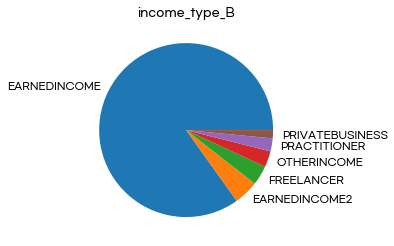

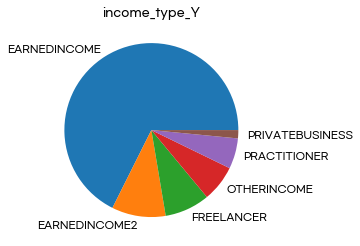

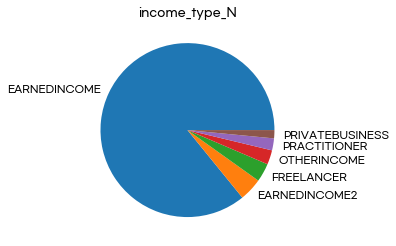

income_type
                 income_type
OTHERINCOME        18.139319
FREELANCER         14.719802
EARNEDINCOME2      13.518268
PRIVATEBUSINESS    11.352610
PRACTITIONER        5.788231
EARNEDINCOME        4.544691
                 income_type
OTHERINCOME        15.354176
FREELANCER         12.831091
EARNEDINCOME2      11.908451
PRIVATEBUSINESS    10.195190
PRACTITIONER        5.471526
EARNEDINCOME        4.347128
                 income_type
EARNEDINCOME       95.652872
PRACTITIONER       94.528474
PRIVATEBUSINESS    89.804810
EARNEDINCOME2      88.091549
FREELANCER         87.168909
OTHERINCOME        84.645824



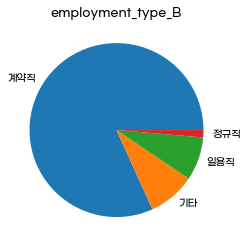

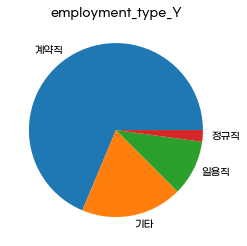

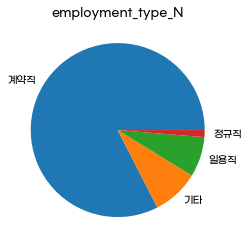

employment_type
     employment_type
기타         14.563708
일용직         9.570075
계약직         6.842415
정규직         4.803502
     employment_type
기타         12.712322
일용직         8.734205
계약직         6.404212
정규직         4.583342
     employment_type
정규직        95.416658
계약직        93.595788
일용직        91.265795
기타         87.287678



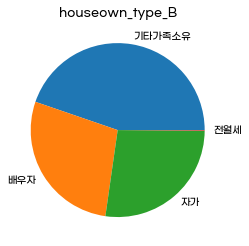

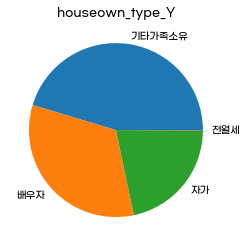

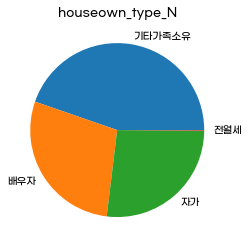

houseown_type
        houseown_type
기타가족소유       7.094893
전월세          5.855752
자가           4.394296
배우자          3.975924
        houseown_type
기타가족소유       6.624866
전월세          5.531822
자가           4.209326
배우자          3.823889
        houseown_type
배우자         96.176111
자가          95.790674
전월세         94.468178
기타가족소유      93.375134



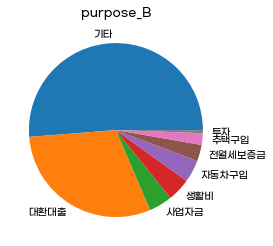

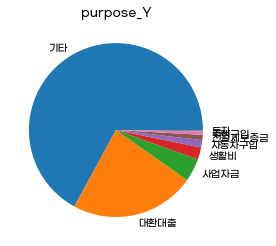

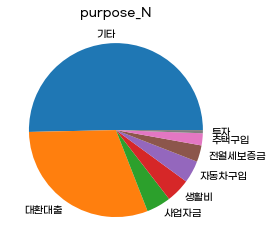

purpose
         purpose
생활비     7.687609
사업자금    5.936226
대환대출    4.376864
기타      4.231158
투자      2.494928
자동차구입   2.449444
전월세보증금  1.766509
주택구입    0.797171
         purpose
생활비     7.138805
사업자금    5.603585
대환대출    4.193328
기타      4.059399
투자      2.434197
자동차구입   2.390881
전월세보증금  1.735845
주택구입    0.790866
          purpose
주택구입    99.209134
전월세보증금  98.264155
자동차구입   97.609119
투자      97.565803
기타      95.940601
대환대출    95.806672
사업자금    94.396415
생활비     92.861195



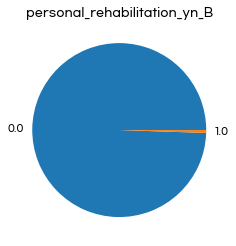

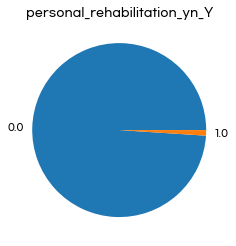

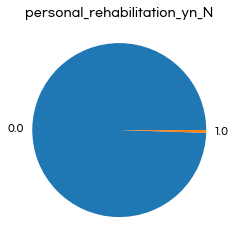

personal_rehabilitation_yn
     personal_rehabilitation_yn
1.0                   12.619699
0.0                    6.022003
     personal_rehabilitation_yn
1.0                   11.205588
0.0                    5.679956
     personal_rehabilitation_yn
0.0                   94.320044
1.0                   88.794412



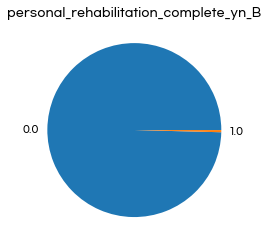

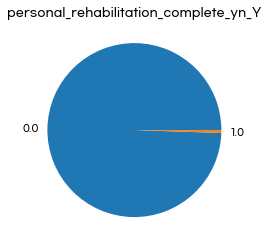

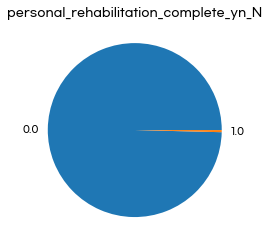

personal_rehabilitation_complete_yn
     personal_rehabilitation_complete_yn
1.0                             8.173456
0.0                             5.986716
     personal_rehabilitation_complete_yn
1.0                             7.555879
0.0                             5.648553
     personal_rehabilitation_complete_yn
0.0                            94.351447
1.0                            92.444121



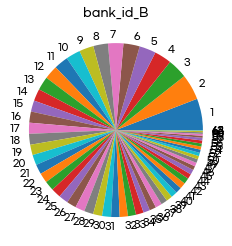

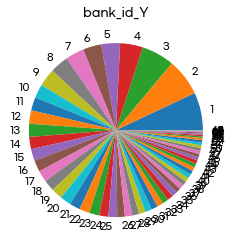

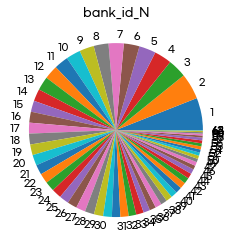

bank_id
       bank_id
16  400.000000
29   28.403239
4    24.934707
60   12.721850
49   12.075698
..         ...
55    1.629779
12    1.420281
46    1.243388
61    1.071155
28    0.196597

[62 rows x 1 columns]
      bank_id
16  80.000000
29  22.120345
4   19.958191
60  11.286055
49  10.774591
..        ...
55   1.603643
12   1.400392
46   1.228117
61   1.059803
28   0.196212

[62 rows x 1 columns]
      bank_id
28  99.803788
61  98.940197
46  98.771883
12  98.599608
55  98.396357
..        ...
49  89.225409
60  88.713945
4   80.041809
29  77.879655
16  20.000000

[62 rows x 1 columns]



In [18]:
for name in columnlist:
    BYN(name)

In [ ]:
'product_id'
complement = list(set(yes['product_id'].value_counts().index) - set(no['product_id'].value_counts().index))
print( complement ) # ['B', 'A']

In [ ]:
B

In [ ]:
plt.pie(B, labels=B, explode=[1 for ex in range(len(B))])
plt.savefig(f'./visual/{name}.jpg')
plt.show()
plt.pie(Y, labels=Y, explode=[1 for ex in range(len(Y))])
plt.savefig(f'./visual/{name}.jpg')
plt.show()
plt.pie(N, labels=N, explode=[1 for ex in range(len(N))])
plt.savefig(f'./visual/{name}.jpg')
plt.show()